In [1]:
import Pkg; Pkg.add("ModelingToolkit"); Pkg.add("OrdinaryDiffEq")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SIMDDualNumbers ────────────────── v0.1.0
   Installed TreeViews ──────────────────────── v0.3.0
   Installed StatsFuns ──────────────────────── v0.9.18
   Installed Referenceables ─────────────────── v0.1.2
   Installed DomainSets ─────────────────────── v0.5.9
   Installed Unitful ────────────────────────── v1.11.0
   Installed NonlinearSolve ─────────────────── v0.3.16
   Installed MutableArithmetics ─────────────── v1.0.0
   Installed JuliaFormatter ─────────────────── v0.22.7
   Installed PDMats ─────────────────────────── v0.11.7
   Installed LabelledArrays ─────────────────── v1.8.0
   Installed Bijections ─────────────────────── v0.1.3
   Installed TimerOutputs ───────────────────── v0.5.16
   Installed DEDataArrays ───────────────────── v0.2.2
   Installed FunctionWrappers ───────────────── v1.1.2
   Installed Polyester ──────────────────────── v0.6.8
   Installed Recursiv

  ✓ PDMats
  ✓ InitialValues
  ✓ UnPack
  ✓ Combinatorics
  ✓ IntegerMathUtils
  ✓ CommonSolve
  ✓ ArgCheck
  ✓ ManualMemory
  ✓ PoissonRandom
  ✓ CompositeTypes
  ✓ KrylovKit
  ✓ GenericSchur
  ✓ AutoHashEquals
  ✓ SIMDTypes
  ✓ ZygoteRules
  ✓ ArnoldiMethod
  ✓ Distances
  ✓ CompositionsBase
  ✓ AbstractTrees
  ✓ TreeViews
  ✓ DefineSingletons
  ✓ RandomExtensions
  ✓ IfElse
  ✓ Inflate
  ✓ CpuId
  ✓ ConstructionBase
  ✓ Krylov
  ✓ FastClosures
  ✓ DensityInterface
  ✓ TermInterface
  ✓ Bijections
  ✓ IterativeSolvers
  ✓ Crayons
  ✓ Referenceables
  ✓ Baselet
  ✓ CommonSubexpressions
  ✓ MutableArithmetics
  ✓ SimpleTraits
  ✓ RandomNumbers
  ✓ SuiteSparse_jll
  ✓ Rmath_jll
  ✓ RuntimeGeneratedFunctions
  ✓ DiffRules
  ✓ Hwloc_jll
  ✓ DiffResults
  ✓ Parameters
  ✓ Tokenize
  ✓ Primes
  ✓ ThreadingUtilities
  ✓ TimerOutputs
  ✓ Static
  ✓ KLU
  ✓ Rmath
  ✓ Hwloc
  ✓ Setfield
  ✓ BitTwiddlingConvenienceFunctions
  ✓ CPUSummary
  ✓ ArrayInterface
  ✓ MultivariatePolynomials
  ✓ Splitt

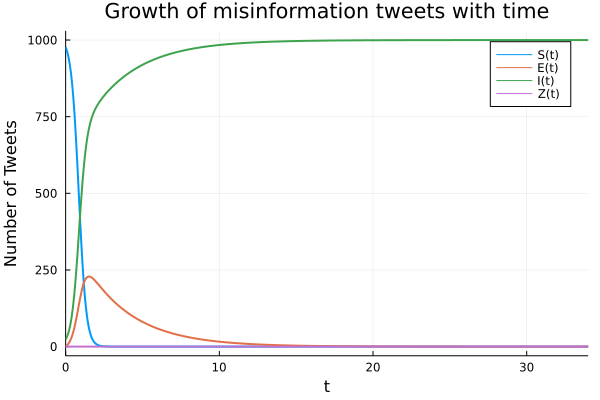

In [6]:
using ModelingToolkit, OrdinaryDiffEq, Plots

@parameters t 𝜀 ρ β b p l N
@variables S(t) E(t) I(t) Z(t)
D = Differential(t)

eqs = [D(S) ~ -β*S*(I/N) - b*S*(Z/N),
       D(E) ~ (1-p)*β*S*(I/N) + (1-l)*β*S*(Z/N) - ρ*E*(l/N) - 𝜀*E,
       D(I) ~ p*β*S*(I/N) + ρ*E*(I/N) + 𝜀*E,
       D(Z) ~ l*b*S*(Z/N)]

@named sys = ODESystem(eqs)
sys = ode_order_lowering(sys)

u0 = [S => 977,
      E => 0,
      I => 23,
      Z => 0]

p  = [𝜀 => 0.323,
      ρ => 1e-17,
      β => 5.6,
      b => 42.72,
      p => 0.69,
      l => 0.68,
      N => 1000]

tspan = (0,34)
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Tsit5())

plot(sol,vars=(t,S), label = "S(t)",linewidth=2, title = "Growth of misinformation tweets with time"); 
plot!(sol,vars=(t,E),label = "E(t)", linewidth=2); 
plot!(sol,vars=(t,I),label = "I(t)", linewidth=2); 
plot!(sol,vars=(t,Z), label = "Z(t)", ylabel = "Number of Tweets", linewidth=2)